In [33]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

complaints = pd.read_csv('complaints.csv')
complaints = complaints[1:]
watchlist = pd.read_csv('officerwatchlist.csv')



  Employee ID-HCM          HCM name  Last name First name Date hired  \
1          103590  Abasciano,Joseph  Abasciano     Joseph    6/25/07   
2          103590  Abasciano,Joseph  Abasciano     Joseph    6/25/07   
3          103590  Abasciano,Joseph  Abasciano     Joseph    6/25/07   
4          103590  Abasciano,Joseph  Abasciano     Joseph    6/25/07   
5          103590  Abasciano,Joseph  Abasciano     Joseph    6/25/07   

  Received date         IA No        Finding      Incident type  \
1       4/12/11  IAD2011-0182     Exonerated  Citizen complaint   
2       4/12/11  IAD2011-0182  Not Sustained  Citizen complaint   
3       1/18/13  IAD2013-0019  Not Sustained  Citizen complaint   
4      10/31/18  IAD2018-0479     Exonerated  Citizen complaint   
5      10/31/18  IAD2018-0479  Not Sustained  Citizen complaint   

                    Allegation Admin Leave Y/N Action taken  \
1  Neg.Duty/Unreasonable Judge               N          NaN   
2                 Use of Force        

In [22]:
print(len(complaints['HCM name'].unique()))
print(len(watchlist))


2067
136


# There are 2,067 officers with filed complaints, and 136 officers on the BPD watchlist.

# # of officers that are placed on admin leave following a complaint

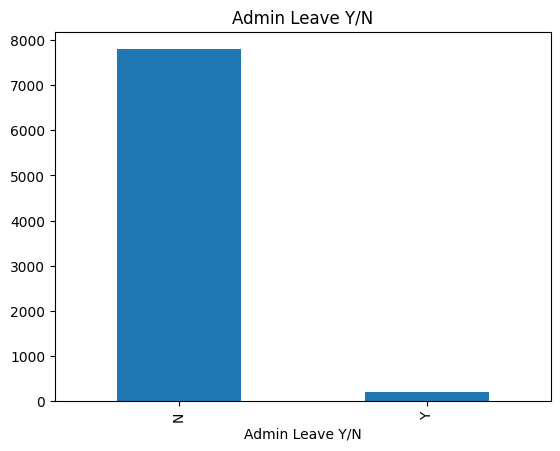

In [32]:
adminleaves = complaints.groupby('Admin Leave Y/N').size()
adminleaves.plot(kind='bar', title='Admin Leave Y/N')
plt.show()


# Officers that are on the watchlist for Overtime related investigation

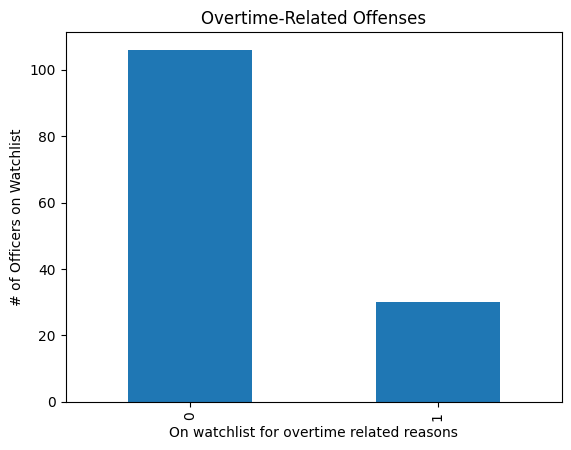

In [28]:
def isovertimerelated(text):
    if type(text) != str:
        return 0
    if 'overtime' in text.lower():
        return 1
    else:
        return 0

watchlist['isovertimerelated'] = watchlist.apply(lambda row : isovertimerelated(row['INFORMATION REGARDING LEAD ENTRY']), axis =1)

overtimerelated = watchlist.groupby('isovertimerelated').size()
overtimerelated.plot(kind='bar', title='Overtime-Related Offenses')
plt.xlabel("On watchlist for overtime related reasons")
plt.ylabel("# of Officers on Watchlist")
plt.show()


# # of unique offences that an officer could be put on the watchlist: 67

In [31]:
print(len(watchlist['INFORMATION REGARDING LEAD ENTRY'].unique()))


67
